# Market Features Overview

This section explores key market features used in our analysis, including market breadth indicators, technical signals, and sector mappings. For detailed definitions, see [docs/market_features.md](../docs/market_features.md).

**Features include:**
- Advance-Decline Line
- New Highs and New Lows
- Percentage Above Moving Averages (MA20, MA50)
- RSI (Bullish, Oversold, Overbought)
- MACD Bullish
- Sector Mapping

In [12]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load market breadth data
market_breadth = pd.read_parquet('../data/market_features/daily_breadth.parquet')
market_breadth.tail()

,adv_dec_line,new_highs,new_lows,above_ma20,above_ma50,rsi_bullish,rsi_oversold,rsi_overbought,macd_bullish
Date,,,,,,,,,
2025-05-28,-4,21,28,31.610338,25.049702,60.238569,0.397614,4.572565,72.564612
2025-05-29,0,21,28,31.411531,25.248509,65.805169,0.397614,4.572565,71.968191
2025-05-30,-4,20,28,31.610338,24.850895,66.799205,0.596421,4.970179,71.570577
2025-06-02,-2,20,28,31.809145,25.049702,64.612326,0.596421,6.163022,71.371769
2025-06-03,2,20,29,31.809145,25.248509,71.570577,0.397614,7.554672,72.166998


## Data Summary

Below we display the structure and a sample of the market breadth data, including the date range and missing values.

In [4]:
print("Market Breadth Info:")
print(market_breadth.info())
print(market_breadth.head())
print(f"\nDate range: {market_breadth.index.min()} to {market_breadth.index.max()}")
print(f"\nAny NaNs per column:\n{market_breadth.isna().sum()}")

Market Breadth Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63 entries, 2025-03-05 to 2025-06-03
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   adv_dec_line    63 non-null     int64  
 1   new_highs       63 non-null     int64  
 2   new_lows        63 non-null     int64  
 3   above_ma20      63 non-null     float64
 4   above_ma50      63 non-null     float64
 5   rsi_bullish     63 non-null     float64
 6   rsi_oversold    63 non-null     float64
 7   rsi_overbought  63 non-null     float64
 8   macd_bullish    63 non-null     float64
dtypes: float64(6), int64(3)
memory usage: 4.9 KB
None
            adv_dec_line  new_highs  new_lows  above_ma20  above_ma50  \
Date                                                                    
2025-03-05             8         18        28   31.809145   24.850895   
2025-03-06             8         19        28   31.411531   24.652087   
2025-03-07     

## Visualizing Market Breadth Indicators

We plot several key indicators to visualize market conditions over time.

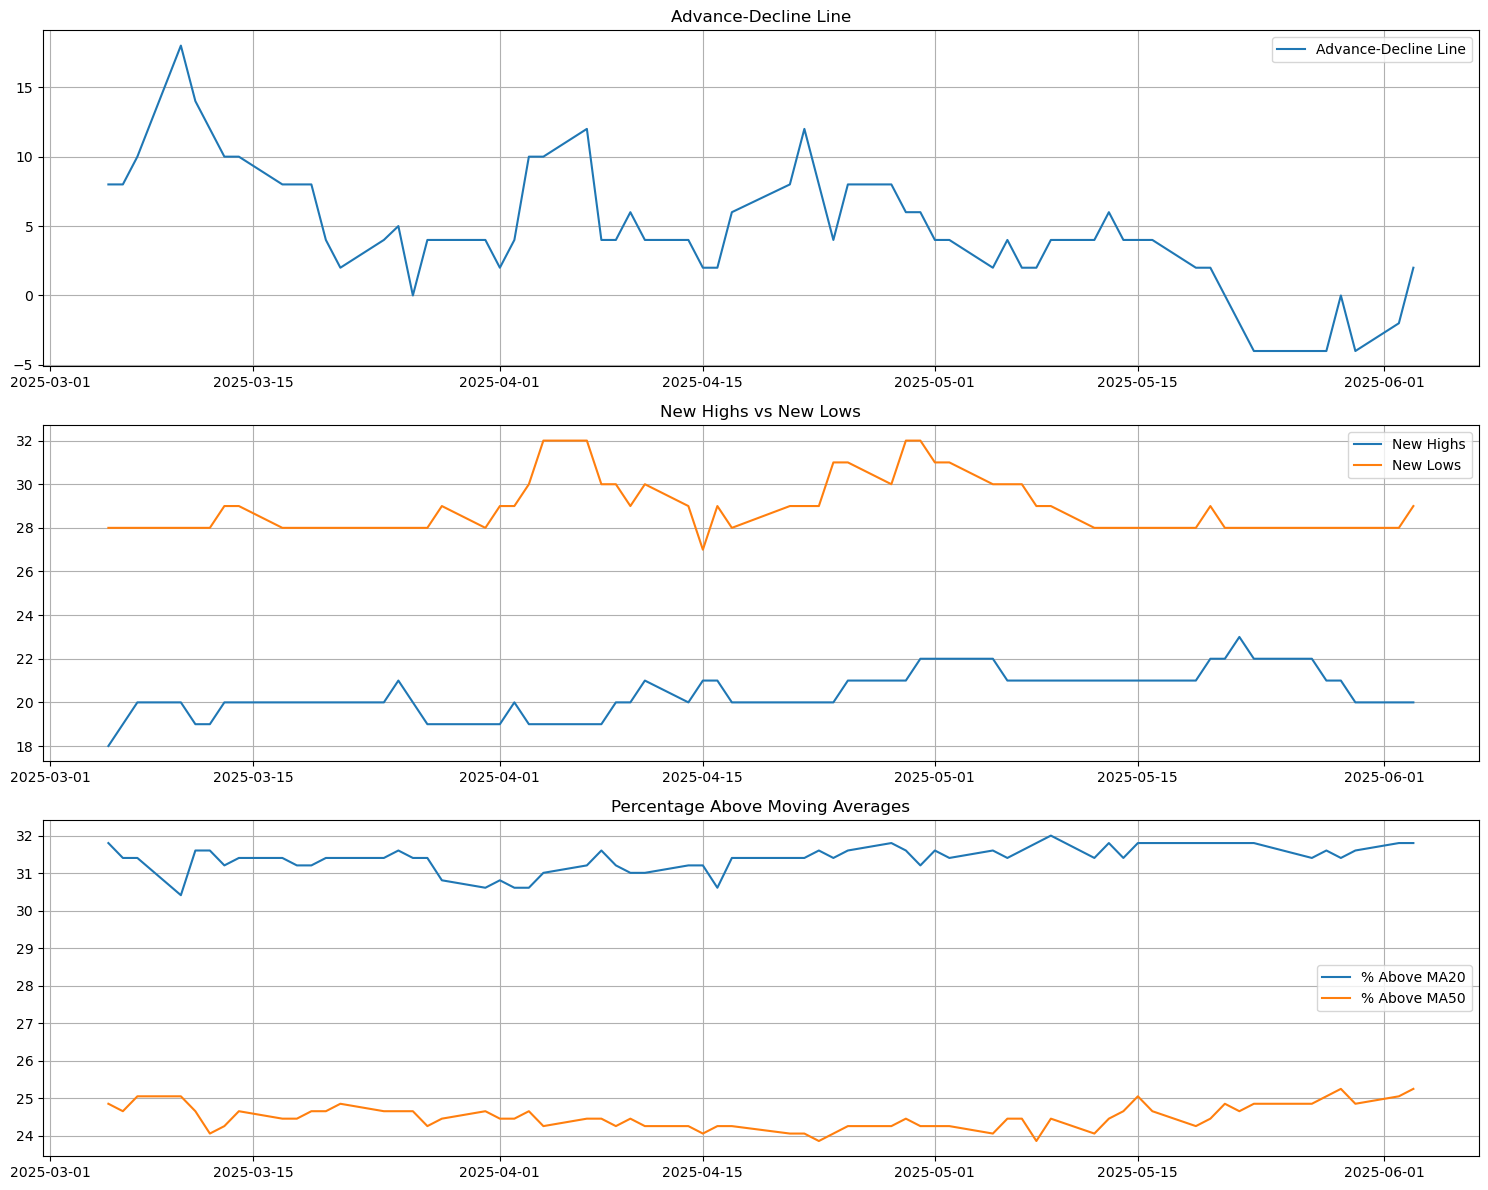

In [5]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# Advance-Decline Line
axes[0].plot(market_breadth.index, market_breadth['adv_dec_line'], label='Advance-Decline Line')
axes[0].set_title('Advance-Decline Line')
axes[0].legend()
axes[0].grid(True)

# New Highs and Lows
axes[1].plot(market_breadth.index, market_breadth['new_highs'], label='New Highs')
axes[1].plot(market_breadth.index, market_breadth['new_lows'], label='New Lows')
axes[1].set_title('New Highs vs New Lows')
axes[1].legend()
axes[1].grid(True)

# Percentage Above Moving Averages
axes[2].plot(market_breadth.index, market_breadth['above_ma20'], label='% Above MA20')
axes[2].plot(market_breadth.index, market_breadth['above_ma50'], label='% Above MA50')
axes[2].set_title('Percentage Above Moving Averages')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()

## Technical Indicators

We also examine technical signals such as RSI and MACD bullishness.

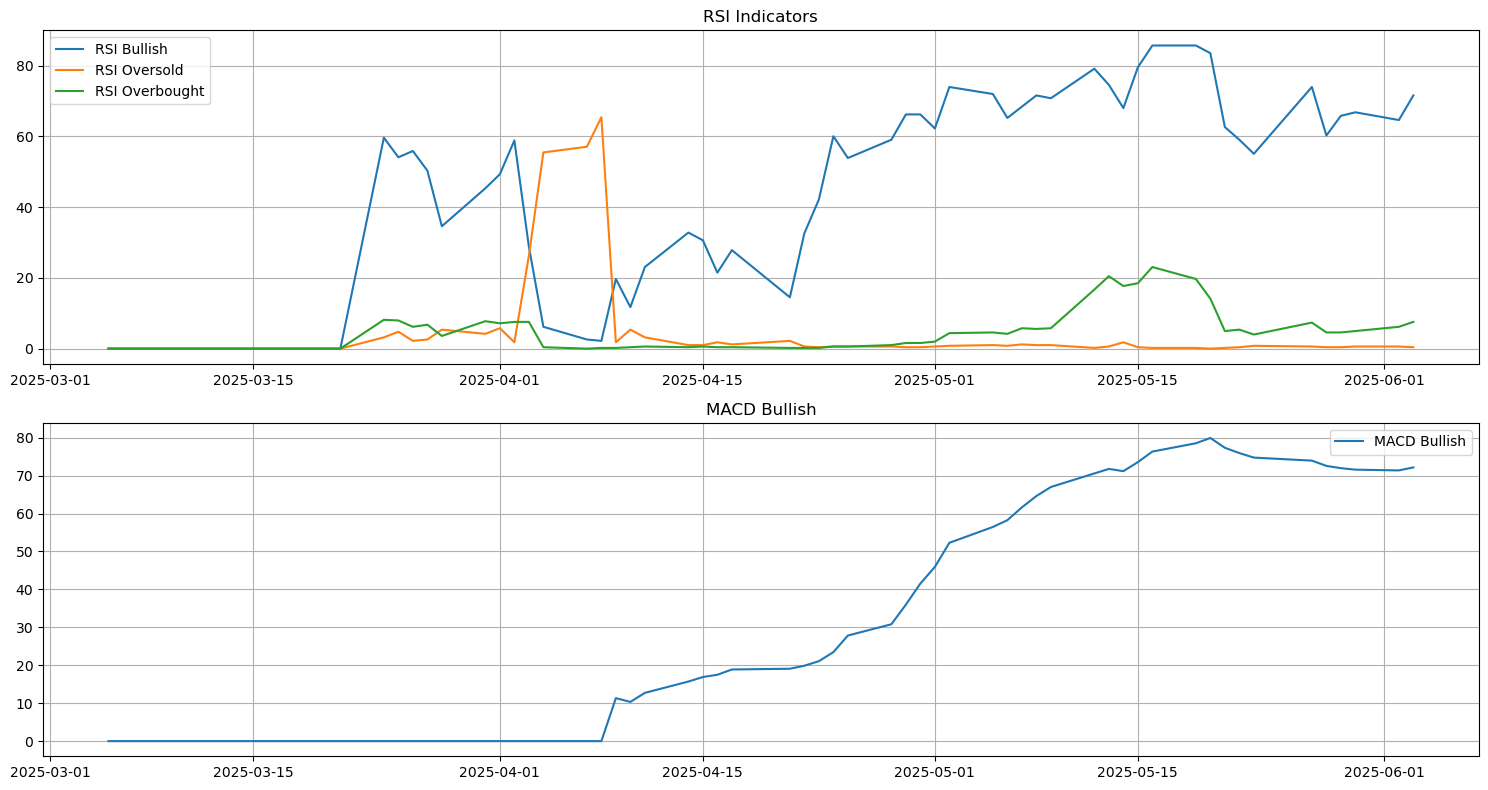

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

# RSI indicators
axes[0].plot(market_breadth.index, market_breadth['rsi_bullish'], label='RSI Bullish')
axes[0].plot(market_breadth.index, market_breadth['rsi_oversold'], label='RSI Oversold')
axes[0].plot(market_breadth.index, market_breadth['rsi_overbought'], label='RSI Overbought')
axes[0].set_title('RSI Indicators')
axes[0].legend()
axes[0].grid(True)

# MACD Bullish
axes[1].plot(market_breadth.index, market_breadth['macd_bullish'], label='MACD Bullish')
axes[1].set_title('MACD Bullish')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Correlation Analysis

The following heatmap shows the correlation between different market features.

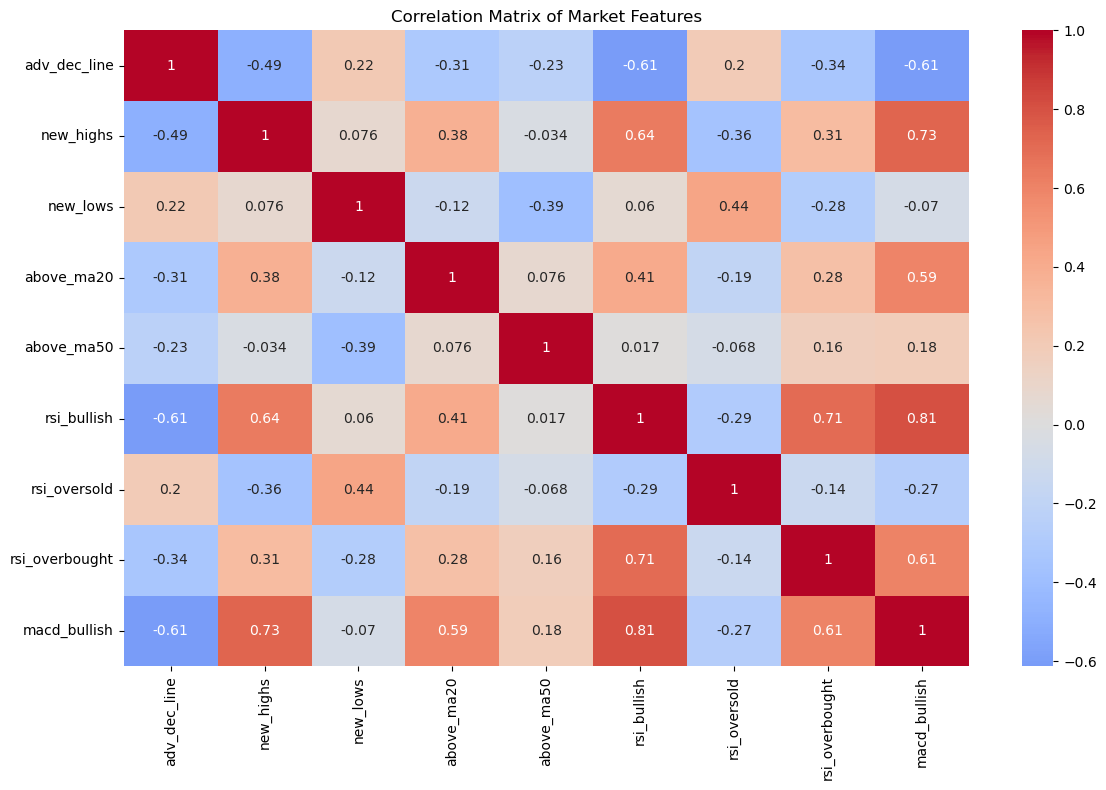

In [7]:
correlation_matrix = market_breadth.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Market Features')
plt.tight_layout()
plt.show()

## Summary Statistics

We compute summary statistics for all market features to understand their distributions.

In [8]:
summary_stats = market_breadth.describe()
display(summary_stats)

,adv_dec_line,new_highs,new_lows,above_ma20,above_ma50,rsi_bullish,rsi_oversold,rsi_overbought,macd_bullish
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,4.777778,20.396825,28.920635,31.411531,24.497460,41.736880,4.272776,4.509451,30.360693
std,4.419329,1.024533,1.235256,0.357068,0.330060,29.556316,12.916291,5.812191,31.513275
min,-4.000000,18.000000,27.000000,30.417495,23.856859,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.000000,28.000000,31.212724,24.254473,8.946322,0.198807,0.198807,0.000000
50%,4.000000,20.000000,28.000000,31.411531,24.453280,53.876740,0.596421,1.988072,18.886680
75%,8.000000,21.000000,29.500000,31.610338,24.652087,66.202783,1.789264,6.461233,68.787276
max,18.000000,23.000000,32.000000,32.007952,25.248509,85.685885,65.407555,23.061630,79.920477


## Sector Mapping

Sector mapping links each ticker to its sector and subsector. For more, see [docs/market_features.md](../docs/market_features.md).

In [13]:
with open('../data/market_features/sector_mapping.json', 'r') as f:
    sector_dict = json.load(f)

sector_mapping = pd.DataFrame(list(sector_dict.items()), columns=['ticker', 'sector'])
display(sector_mapping.head())
print(f"\n{sector_mapping['sector'].nunique()} distinct sectors:\n{sector_mapping['sector'].unique()}")

,ticker,sector
0,HON,Industrials
1,HUBB,Industrials
2,FDS,Financial Services
3,AXP,Financial Services
4,NI,Utilities



11 distinct sectors:
['Industrials' 'Financial Services' 'Utilities' 'Energy' 'Real Estate'
 'Consumer Cyclical' 'Healthcare' 'Technology' 'Basic Materials'
 'Consumer Defensive' 'Communication Services']
